In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from typing import List
from pydantic import BaseModel
from sklearn.linear_model import LinearRegression

import sys

sys.path.append("../")

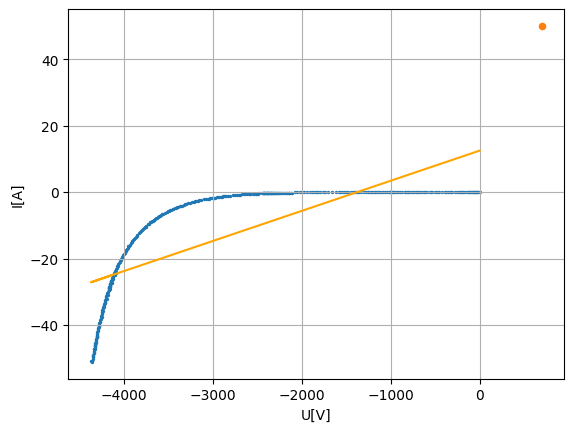

a=0.009054346093305818 b=12.4803559584228


In [11]:
from processing.linear_regression import get_regression

df = pd.read_csv("data/multimeter_data/sanitized/zener-z-4.csv", index_col=False, header=0)

voltage = df["U"].to_numpy()
current = df["I"].to_numpy()

data, vals, model = get_regression(voltage, current)

plt.figure()
plt.grid()
plt.xlabel("U[V]")
plt.ylabel("I[A]")
plt.plot(vals, model.predict(vals), color="orange")
plt.scatter(df["U"], df["I"], zorder=-1, s=2)
plt.scatter(700, 50, zorder=-1, s=20)
# plt.plot(_x, regression_model.predict(_x), color="orange")
plt.show()

print(data)

In [12]:
# from processing.devices import BRYMEN_BM811_VOLTAGE
from processing.uncertainty import compute_uncertainty, DeviceUncertainty, Uncertainty

BRYMEN_BM811_VOLTAGE = DeviceUncertainty(
    device_name="BrymenB811",
    probing_specs=[
    (
        50,
        Uncertainty(
            uncentainty=0.0012,
            lsd_magnitude=0.01,
            c_constant=2
        )
    ),
    (
        500,
        Uncertainty(
            uncentainty=0.0006,
            lsd_magnitude=0.01,
            c_constant=2
        )
    )
    ]
)
# print(BRYMEN_BM811_VOLTAGE)

df["u(U)"] = [compute_uncertainty(v, BRYMEN_BM811_VOLTAGE) for v in voltage]

None


AttributeError: 'NoneType' object has no attribute 'uncertainty'